In [2]:
# Regression

import pandas as pd

bp = pd.read_csv("bp.csv")

In [3]:
bp.head(10)


,Age,SBP
0,22,131
1,23,128
2,24,116
3,27,106
4,28,114
5,29,123
6,30,117
7,32,122
8,33,99
9,35,121


<AxesSubplot:xlabel='Age', ylabel='SBP'>

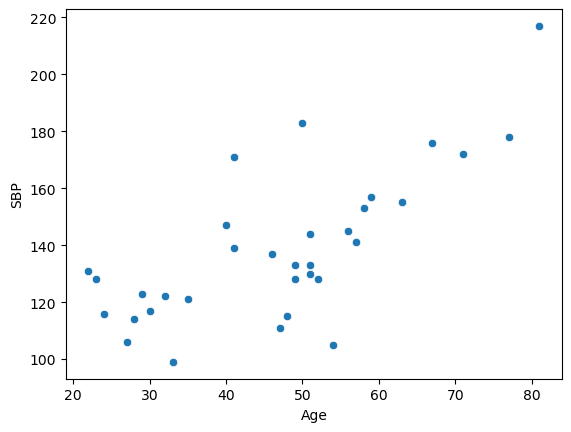

In [ ]:
import seaborn as sns

sns.scatterplot(data = bp, x = "Age", y = "SBP")

In [ ]:
slope = (220-100)/ (85-18)

In [ ]:
slope


1.791044776119403

In [ ]:
# equation of line
# P0 = (18, 100)
# P1 = (85,220)

def predict_SBP(age):
    return slope*(age-18)+100

In [ ]:
print(predict_SBP(18))
print(predict_SBP(80))

100.0
211.04477611940297


In [ ]:
print(predict_SBP(70))

193.13432835820896


In [ ]:
print(172-193.13)

-21.129999999999995


In [ ]:
for ind in bp.index:
    print(bp['Age'][ind], bp['SBP'][ind])

22 131
23 128
24 116
27 106
28 114
29 123
30 117
32 122
33 99
35 121
40 147
41 139
41 171
46 137
47 111
48 115
49 133
49 128
50 183
51 130
51 133
51 144
52 128
54 105
56 145
57 141
58 153
59 157
63 155
67 176
71 172
77 178
81 217


In [ ]:
error = 0
for ind in bp.index:
    error = error + abs(bp['SBP'][ind]-predict_SBP(bp['Age'][ind]))
print(error)

660.283582089552


In [ ]:
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models

In [ ]:
# Fit the model
model = ols("SBP ~ Age", bp).fit()

In [ ]:
error = abs(model.predict(bp['Age']) - bp['SBP'])
error.sum()

432.7407934700076

In [ ]:
error

0     22.590357
1     18.367953
2      5.145549
3      8.521664
4      1.744068
5      6.033528
6      1.188876
7      1.366315
8     22.856089
9      3.300897
10    16.587082
11     7.364678
12    39.364678
13     0.747342
14    27.969747
15    25.192151
16     8.414555
17    13.414555
18    40.363041
19    13.859363
20    10.859363
21     0.140637
22    17.081767
23    42.526576
24     4.971384
25    10.193788
26     0.583808
27     3.361404
28     3.528213
29    12.582171
30     3.692554
31     2.358129
32    36.468513
dtype: float64

In [ ]:
import pandas as pd

tshirt = pd.read_csv("t_shirt.csv")
tshirt

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


<AxesSubplot:xlabel='Height', ylabel='Weight'>

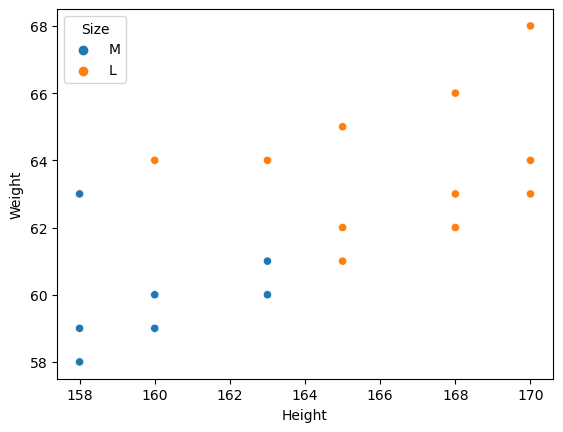

In [ ]:
sns.scatterplot(data = tshirt, x = "Height", y = "Weight", hue="Size")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
x_train = tshirt[['Height','Weight']]
y_train = tshirt['Size']

neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(neigh.predict([[180,60]]))

['L']


/Users/asajun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/asajun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
t_test= pd.read_csv("t_shirt_test.csv")

In [ ]:
actual = t_test['Size']
predicted= neigh.predict(t_test[['Height', 'Weight']])

/Users/asajun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
print(actual)
print(predicted)

0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     L
8     L
9     L
10    L
11    L
12    L
13    L
14    L
15    L
16    L
17    L
Name: Size, dtype: object
['M' 'M' 'M' 'M' 'M' 'M' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'M' 'L' 'L' 'L']


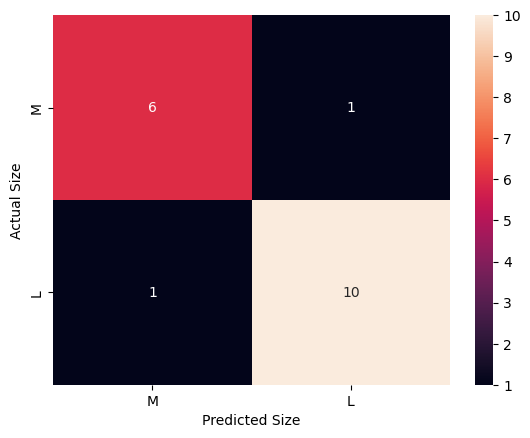

Classification report : 
               precision    recall  f1-score   support

           M       0.86      0.86      0.86         7
           L       0.91      0.91      0.91        11

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# outcome values order in sklearn
cm = confusion_matrix(actual,predicted,labels=['M','L'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted Size');ax.set_ylabel('Actual Size');

ax.xaxis.set_ticklabels(['M', 'L']); ax.yaxis.set_ticklabels(['M', 'L']);
plt.show()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=['M','L'])
print('Classification report : \n',matrix)

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#Train the model using the training sets
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
print(clf.predict([[158,60]]))

['M']


/Users/asajun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
actual = t_test['Size']
predicted= clf.predict(t_test[['Height', 'Weight']])

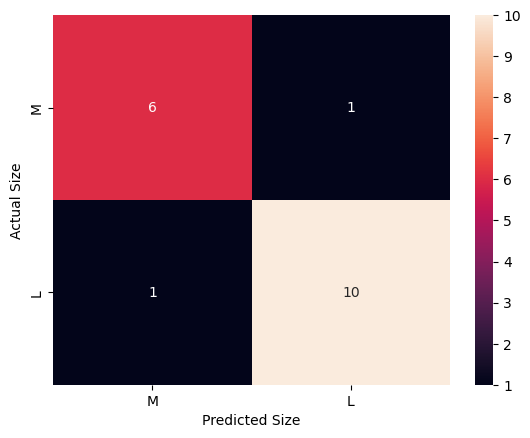

Classification report : 
               precision    recall  f1-score   support

           M       0.86      0.86      0.86         7
           L       0.91      0.91      0.91        11

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# outcome values order in sklearn
cm = confusion_matrix(actual,predicted,labels=['M','L'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted Size');ax.set_ylabel('Actual Size');

ax.xaxis.set_ticklabels(['M', 'L']); ax.yaxis.set_ticklabels(['M', 'L']);
plt.show()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=['M','L'])
print('Classification report : \n',matrix)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
actual = t_test['Size']
predicted= dtc.predict(t_test[['Height', 'Weight']])

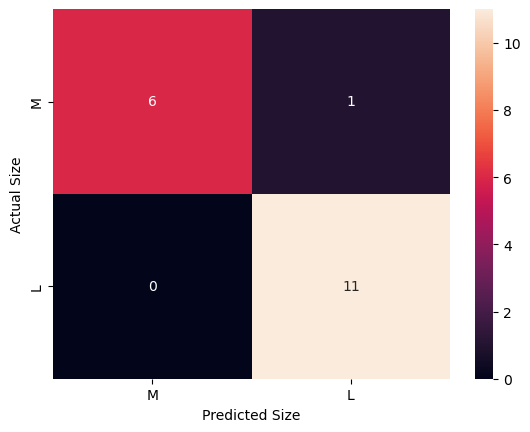

Classification report : 
               precision    recall  f1-score   support

           M       1.00      0.86      0.92         7
           L       0.92      1.00      0.96        11

    accuracy                           0.94        18
   macro avg       0.96      0.93      0.94        18
weighted avg       0.95      0.94      0.94        18



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# outcome values order in sklearn
cm = confusion_matrix(actual,predicted,labels=['M','L'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted Size');ax.set_ylabel('Actual Size');

ax.xaxis.set_ticklabels(['M', 'L']); ax.yaxis.set_ticklabels(['M', 'L']);
plt.show()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=['M','L'])
print('Classification report : \n',matrix)

In [ ]:
from sklearn import tree
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_0 <= 164.00
|   |--- feature_1 <= 63.50
|   |   |--- class: M
|   |--- feature_1 >  63.50
|   |   |--- class: L
|--- feature_0 >  164.00
|   |--- class: L

